In [1]:
import pandas as pd

df = pd.read_csv('./data/전기생산량.csv',parse_dates=True, index_col=0).reset_index()
df.head()

,날짜,시간,15분,30분,45분,60분,평균,생산량,기온,풍속,습도,강수량,전기요금(계절),day,d,m,공장인원,인건비
0,2021-01-01,0,62,61,61,61,61,0,-3.2,2.4,71,0.0,109.8,5,1,1,0.0,1.5
1,2021-01-01,1,96,93,116,113,105,0,-4.5,1.5,77,0.0,109.8,5,1,1,0.0,1.5
2,2021-01-01,2,106,96,106,107,104,0,-3.9,2.6,58,0.0,109.8,5,1,1,0.0,1.5
3,2021-01-01,3,92,110,110,109,105,0,-4.1,2.6,56,0.0,109.8,5,1,1,0.0,1.5
4,2021-01-01,4,108,105,106,108,107,0,-4.6,2.6,60,0.0,109.8,5,1,1,0.0,1.5


In [2]:
new_column_names = [
    'date',
    'hour',
    '15mins',
    '30mins',
    '45mins',
    '60mins',
    'average',
    'production',
    'temperature',
    'wind_speed',
    'humidity',
    'rainfall',
    'electricity_bill_by_season',
    'day_of_the_week',
    'day',
    'month',
    'num_of_workers',
    'personnel_expenses'
]

df.columns = new_column_names
print('The number of columns in the dataset is:' , len(df.columns))
print('The number of rows in the dataset is:' , len(df))

The number of columns in the dataset is: 18
The number of rows in the dataset is: 6168


In [3]:
df['y'] = df['date'].dt.year
df['m'] = df['date'].dt.month 
df['d'] = df['date'].dt.day
df['day'] = df['date'].dt.dayofweek

In [4]:
df_group_day = df.groupby('date').mean().reset_index()

In [5]:
df_group_day.isnull().any()

date                          False
hour                          False
15mins                        False
30mins                        False
45mins                        False
60mins                        False
average                       False
production                    False
temperature                   False
wind_speed                    False
humidity                      False
rainfall                      False
electricity_bill_by_season    False
day_of_the_week               False
day                           False
month                         False
num_of_workers                False
personnel_expenses            False
y                             False
m                             False
d                             False
dtype: bool

In [6]:
df_group_day['part_of_the_week']=df_group_day.day.map(lambda x: 'Weekday' if x<5 else 'Weekend')

In [7]:
list_bill= df_group_day.electricity_bill_by_season.unique()
print(list_bill)
season_mapping = {
    list_bill[0]: 'Winter',
    list_bill[1]: 'Spring',
    list_bill[2]: 'Summer'
}
season_mapping2 = {
    list_bill[0]: 2,
    list_bill[1]: 0,
    list_bill[2]: 1
}
# Create the 'Seasons' column based on the mapping
df_group_day['season'] = df_group_day['electricity_bill_by_season'].map(season_mapping)
df_group_day['season_category'] = df_group_day['electricity_bill_by_season'].map(season_mapping2)

[109.8 167.2 191.6]


In [8]:
from category_encoders import BinaryEncoder
bin_encoder = BinaryEncoder()
df_group_day['part_of_the_week_category'] = bin_encoder.fit_transform(df_group_day['part_of_the_week'])['part_of_the_week_0']
df_group_day

,date,hour,15mins,30mins,45mins,60mins,average,production,temperature,wind_speed,...,month,num_of_workers,personnel_expenses,y,m,d,part_of_the_week,season,season_category,part_of_the_week_category
0,2021-01-01,11.5,46.500000,45.791667,46.666667,45.750000,46.250000,0.000000,-1.195833,2.058333,...,1.0,0.000000,1.3125,2021.0,1.0,1.0,Weekday,Winter,2,0
1,2021-01-02,11.5,46.541667,45.875000,46.791667,45.833333,46.333333,0.000000,-0.175000,2.370833,...,1.0,0.000000,1.3125,2021.0,1.0,2.0,Weekend,Winter,2,1
2,2021-01-03,11.5,22.916667,22.750000,22.875000,22.541667,22.875000,0.000000,-0.479167,2.920833,...,1.0,0.000000,1.3125,2021.0,1.0,3.0,Weekend,Winter,2,1
3,2021-01-04,11.5,117.416667,119.666667,124.291667,124.416667,121.500000,569.666667,1.000000,1.979167,...,1.0,0.991849,1.3125,2021.0,1.0,4.0,Weekday,Winter,2,0
4,2021-01-05,11.5,21.791667,22.125000,21.916667,21.916667,21.916667,0.000000,1.154167,1.995833,...,1.0,0.000000,1.3125,2021.0,1.0,5.0,Weekday,Winter,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,2021-09-10,11.5,131.291667,133.083333,134.958333,136.916667,134.166667,782.875000,22.362500,1.312500,...,9.0,1.254724,1.3125,2021.0,9.0,10.0,Weekday,Spring,0,0
253,2021-09-11,11.5,42.625000,43.041667,43.541667,42.125000,42.833333,90.541667,23.729167,1.495833,...,9.0,0.403845,1.3125,2021.0,9.0,11.0,Weekend,Spring,0,1
254,2021-09-12,11.5,23.208333,23.041667,23.291667,23.291667,23.333333,0.000000,23.441667,1.800000,...,9.0,0.000000,1.3125,2021.0,9.0,12.0,Weekend,Spring,0,1
255,2021-09-13,11.5,107.083333,110.000000,112.916667,113.208333,111.000000,590.583333,22.962500,2.104167,...,9.0,0.914591,1.3125,2021.0,9.0,13.0,Weekday,Spring,0,0


In [9]:
df_features = df_group_day[['average','production','temperature', 'wind_speed','humidity','rainfall','num_of_workers','personnel_expenses','electricity_bill_by_season', 'part_of_the_week_category']]
df_group_day.columns

Index(['date', 'hour', '15mins', '30mins', '45mins', '60mins', 'average',
       'production', 'temperature', 'wind_speed', 'humidity', 'rainfall',
       'electricity_bill_by_season', 'day_of_the_week', 'day', 'month',
       'num_of_workers', 'personnel_expenses', 'y', 'm', 'd',
       'part_of_the_week', 'season', 'season_category',
       'part_of_the_week_category'],
      dtype='object')

## Section2: Methodology
We visualized the distribution of all numerical variables in our dataset to see if any of them needed transformations or feature engineering in general.

In [10]:
variable_list = ['production','temperature', 'wind_speed','humidity','rainfall','num_of_workers','personnel_expenses','electricity_bill_by_season']
len(variable_list)

8

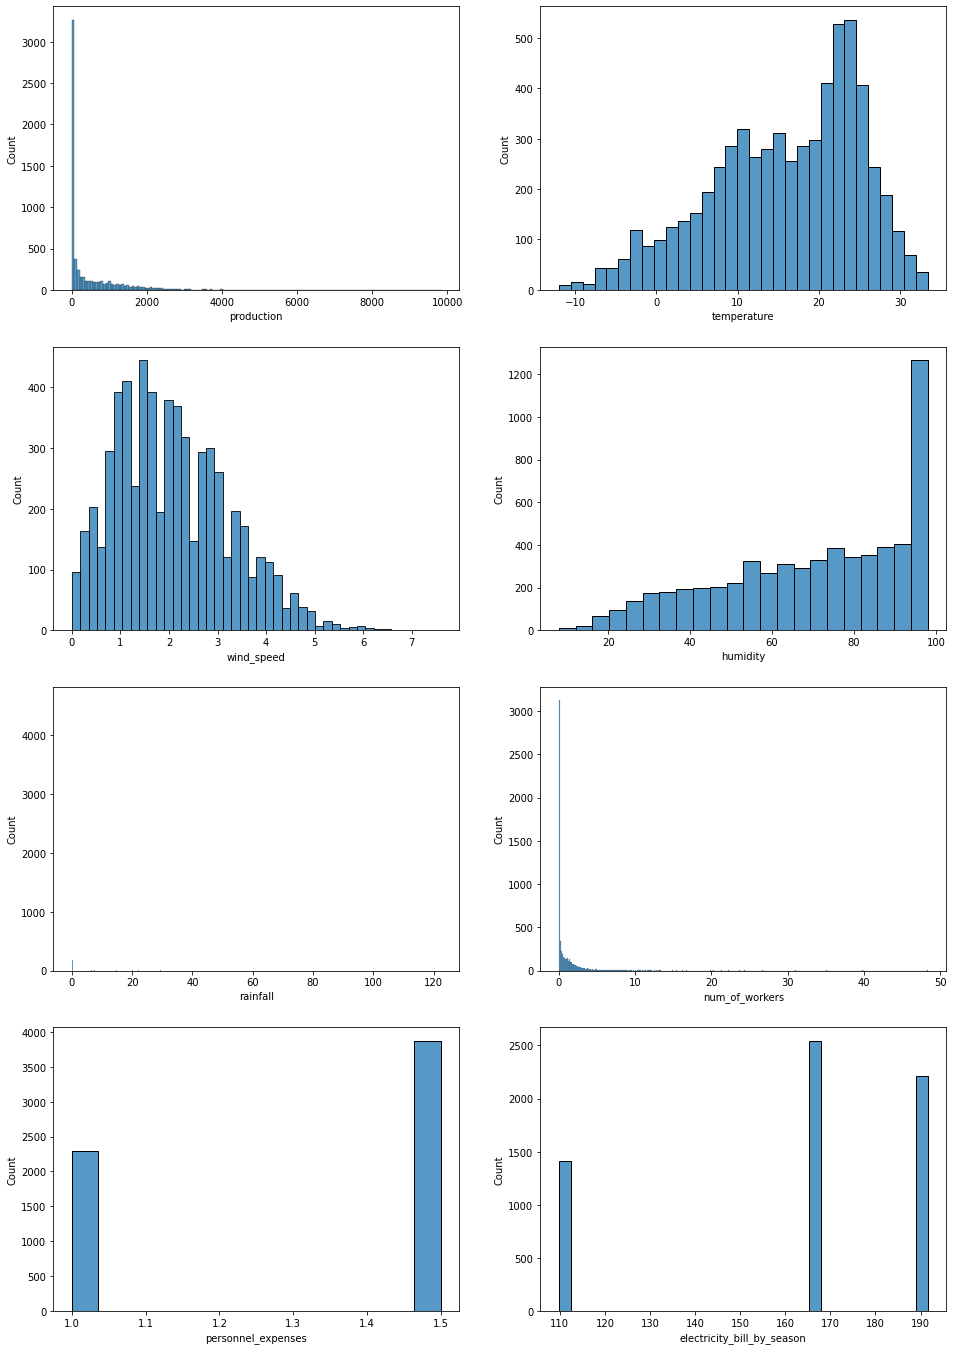

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 24))

for row in range(4):
    for col in range(2):
        idx = row * 2 + col
        
        if idx < len(variable_list):
            ax = axes[row][col]
            var = variable_list[idx]
            sns.histplot(data=df, x=var, ax=ax)
            ax.set(xlabel=var)

We applied binarization on the 'rainfall' data because of the distribution of the variable.  
If the rainfall for a day is over the threshold, the day is considered rainy and if it is below the threshold, it is considered not rainy.

<AxesSubplot:xlabel='rainfall'>

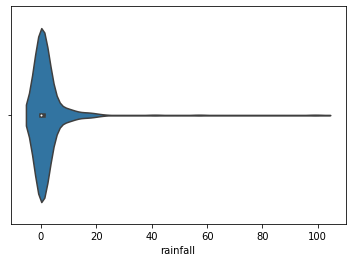

In [12]:
# df['rainfall']
sns.violinplot(data=df_group_day, x='rainfall')

In [13]:
df['rainfall'].describe()

count    6167.000000
mean        2.244252
std         9.613491
min         0.000000
25%         0.000000
50%         0.000000
75%         0.100000
max       122.400000
Name: rainfall, dtype: float64

In [14]:
from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold=0.0001)
df_group_day['rainfall_bin']= binarizer.fit_transform(df_group_day[['rainfall']])

Text(0.5, 1.0, 'Count plot with the binarized data (threshold of 0.001)')

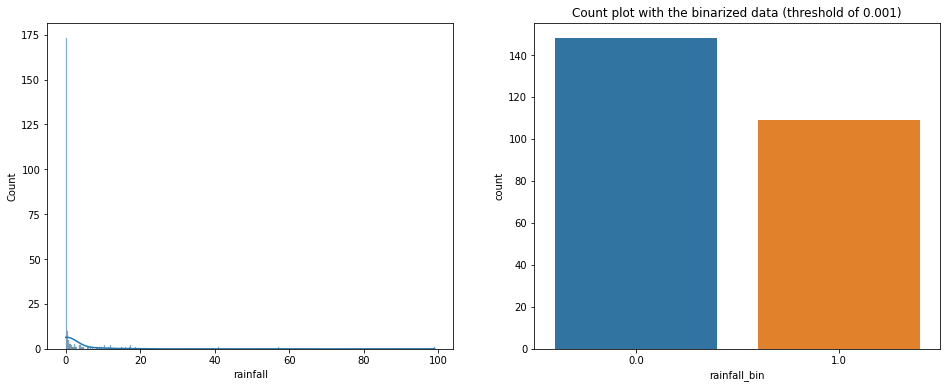

In [15]:
fig, axes = plt.subplots(ncols=2, figsize=(16,6))
sns.histplot(data=df_group_day, x='rainfall', ax=axes[0], kde=True)
# axes[0].set_title('Histogram with whole training data')
sns.countplot(x=df_group_day['rainfall_bin'])
axes[1].set_title('Count plot with the binarized data (threshold of 0.001)')

### prediction model training
we use LSTM for predict average electrocity demand.  
specific date's demand is predicted with last five days demand.

In [16]:
df_group_day.keys()

Index(['date', 'hour', '15mins', '30mins', '45mins', '60mins', 'average',
       'production', 'temperature', 'wind_speed', 'humidity', 'rainfall',
       'electricity_bill_by_season', 'day_of_the_week', 'day', 'month',
       'num_of_workers', 'personnel_expenses', 'y', 'm', 'd',
       'part_of_the_week', 'season', 'season_category',
       'part_of_the_week_category', 'rainfall_bin'],
      dtype='object')

In [17]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MSE
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.preprocessing import MinMaxScaler
import matplotlib.dates as mdates

In [18]:
class ForecastLSTM:
    def __init__(self, random_seed: int = 1234):
        self.random_seed = random_seed

In [19]:
import numpy as np
def reshape_dataset(self, df: pd.DataFrame) -> np.array:
    if "average" in df.columns:
        df = df.drop(columns=["average"]).assign(y=df["average"])
    else:
        raise KeyError("Not found target column 'average' in dataset.")
    
    # shape 변경
    dataset = df.values.reshape(df.shape)
    return dataset

ForecastLSTM.reshape_dataset = reshape_dataset

In [20]:
def split_sequences(
    self, dataset: np.array, seq_len: int, steps: int, single_output: bool
) -> tuple:

    # feature와 y 각각 sequential dataset을 반환할 리스트 생성
    X, y = list(), list()
    # sequence length와 step에 따라 sequential dataset 생성
    for i, _ in enumerate(dataset):
        idx_in = i + seq_len
        idx_out = idx_in + steps
        if idx_out > len(dataset):
            break
        seq_x = dataset[i:idx_in, :-1]
        if single_output:
            seq_y = dataset[idx_out - 1 : idx_out, -1]
        else:
            seq_y = dataset[idx_in:idx_out, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)
ForecastLSTM.split_sequences = split_sequences

In [21]:
def split_train_valid_dataset(
    self,
    df: pd.DataFrame,
    seq_len: int,
    steps: int,
    single_output: bool,
    validation_split: float = 0.3,
    verbose: bool = True,
) -> tuple:
    # dataframe을 numpy array로 reshape
    dataset = self.reshape_dataset(df=df)

    # feature와 y를 sequential dataset으로 분리
    X, y = self.split_sequences(
        dataset=dataset,
        seq_len=seq_len,
        steps=steps,
        single_output=single_output,
    )

    # X, y에서 validation dataset 분리
    dataset_size = len(X)
    train_size = int(dataset_size * (1 - validation_split))
    X_train, y_train = X[:train_size, :], y[:train_size, :]
    X_val, y_val = X[train_size:, :], y[train_size:, :]
    if verbose:
        print(f" >>> X_train: {X_train.shape}")
        print(f" >>> y_train: {y_train.shape}")
        print(f" >>> X_val: {X_val.shape}")
        print(f" >>> y_val: {y_val.shape}")
    return X_train, y_train, X_val, y_val


ForecastLSTM.split_train_valid_dataset = split_train_valid_dataset

In [22]:
def build_and_compile_lstm_model(
    self,
    seq_len: int,
    n_features: int,
    lstm_units: list,
    learning_rate: float,
    dropout: float,
    steps: int,
    metrics: str,
    single_output: bool,
    last_lstm_return_sequences: bool = False,
    dense_units: list = None,
    activation: str = None,
):
    """
    LSTM 네트워크를 생성한 결과를 반환한다.

    :param seq_len: Length of sequences. (Look back window size)
    :param n_features: Number of features. It requires for model input shape.
    :param lstm_units: Number of cells each LSTM layers.
    :param learning_rate: Learning rate.
    :param dropout: Dropout rate.
    :param steps: Length to predict.
    :param metrics: Model loss function metric.
    :param single_output: Whether 'yhat' is a multiple value or a single value.
    :param last_lstm_return_sequences: Last LSTM's `return_sequences`. Allow when `single_output=False` only.
    :param dense_units: Number of cells each Dense layers. It adds after LSTM layers.
    :param activation: Activation function of Layers.
    """
    tf.random.set_seed(self.random_seed)
    model = Sequential()

    if len(lstm_units) > 1:
        # LSTM -> ... -> LSTM -> Dense(steps)
        model.add(
            LSTM(
                units=lstm_units[0],
                activation=activation,
                return_sequences=True,
                input_shape=(seq_len, n_features),
            )
        )
        lstm_layers = lstm_units[1:]
        for i, n_units in enumerate(lstm_layers, start=1):
            if i == len(lstm_layers):
                if single_output:
                    return_sequences = False
                else:
                    return_sequences = last_lstm_return_sequences
                model.add(
                    LSTM(
                        units=n_units,
                        activation=activation,
                        return_sequences=return_sequences,
                    )
                )
            else:
                model.add(
                    LSTM(
                        units=n_units,
                        activation=activation,
                        return_sequences=True,
                    )
                )
    else:
        # LSTM -> Dense(steps)
        if single_output:
            return_sequences = False
        else:
            return_sequences = last_lstm_return_sequences
        model.add(
            LSTM(
                units=lstm_units[0],
                activation=activation,
                return_sequences=return_sequences,
                input_shape=(seq_len, n_features),
            )
        )

    if single_output:  # Single Step, Direct Multi Step
        if dense_units:
            for n_units in dense_units:
                model.add(Dense(units=n_units, activation=activation))
        if dropout > 0:
            model.add(Dropout(rate=dropout))
        model.add(Dense(1))
    else:  # Multiple Output Step
        if last_lstm_return_sequences:
            model.add(Flatten())
        if dense_units:
            for n_units in dense_units:
                model.add(Dense(units=n_units, activation=activation))
        if dropout > 0:
            model.add(Dropout(rate=dropout))
        model.add(Dense(units=steps))

    # Compile the model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss=MSE, metrics=metrics)
    return model


ForecastLSTM.build_and_compile_lstm_model = build_and_compile_lstm_model

In [23]:
def forecast_validation_dataset(self) -> pd.DataFrame:
    # 검증 데이터셋의 실제 값(y)과, 예측 값(yhat)을 저장할 리스트 생성
    y_pred_list, y_val_list = list(), list()
    
    # 훈련된 모델로 validation dataset에 대한 예측값 생성
    for x_val, y_val in zip(self.X_val, self.y_val):
        x_val = np.expand_dims(
            x_val, axis=0
        )  # (seq_len, n_features) -> (1, seq_len, n_features)
        y_pred = self.model.predict(x_val)[0]
        y_pred_list.extend(y_pred.tolist())
        y_val_list.extend(y_val.tolist())
    return pd.DataFrame({"y": y_val_list, "yhat": y_pred_list})


ForecastLSTM.forecast_validation_dataset = forecast_validation_dataset

In [24]:
def fit_lstm(
    self,
    df: pd.DataFrame,
    steps: int,
    lstm_units: list,
    activation: str,
    dropout: float = 0,
    seq_len: int = 16,
    single_output: bool = False,
    epochs: int = 200,
    batch_size: int = None,
    steps_per_epoch: int = None,
    learning_rate: float = 0.001,
    patience: int = 10,
    validation_split: float = 0.3,
    last_lstm_return_sequences: bool = False,
    dense_units: list = None,
    metrics: str = "mse",
    check_point_path: str = None,
    verbose: bool = False,
    plot: bool = True,
):
    """
    :param df: DataFrame for model train.
    :param steps: Length to predict.
    :param lstm_units: LSTM, Dense Layers
    :param activation: Activation function for LSTM, Dense Layers.
    :param dropout: Dropout ratio between Layers.
    :param seq_len: Length of sequences. (Look back window size)
    :param single_output: Select whether 'y' is a continuous value or a single value.
    """

    transformer_x = MinMaxScaler()
    transformer_y = MinMaxScaler()
    
    np.random.seed(self.random_seed)
    tf.random.set_seed(self.random_seed)

    # 훈련, 검증 데이터셋 생성
    (
        self.X_train,
        self.y_train,
        self.X_val,
        self.y_val,
    ) = self.split_train_valid_dataset(
        df=df,
        seq_len=seq_len,
        steps=steps,
        validation_split=validation_split,
        single_output=single_output,
        verbose=verbose,
    )

    
    # LSTM 모델 생성
    n_features = df.shape[1] - 1
    self.model = self.build_and_compile_lstm_model(
        seq_len=seq_len,
        n_features=n_features,
        lstm_units=lstm_units,
        activation=activation,
        learning_rate=learning_rate,
        dropout=dropout,
        steps=steps,
        last_lstm_return_sequences=last_lstm_return_sequences,
        dense_units=dense_units,
        metrics=metrics,
        single_output=single_output,
    )

    # 모델 적합 과정에서 best model 저장
    if check_point_path is not None:
        # create checkpoint
        checkpoint_path = f"checkpoint/lstm_{check_point_path}.h5"
        checkpoint = ModelCheckpoint(
            filepath=checkpoint_path,
            save_weights_only=False,
            save_best_only=True,
            monitor="val_loss",
            verbose=verbose,
        )
        rlr = ReduceLROnPlateau(
            monitor="val_loss", factor=0.5, patience=patience, verbose=verbose
        )
        callbacks = [checkpoint, EarlyStopping(patience=patience), rlr]
    else:
        rlr = ReduceLROnPlateau(
            monitor="val_loss", factor=0.5, patience=patience, verbose=verbose
        )
        callbacks = [EarlyStopping(patience=patience), rlr]

    # 모델 훈련
    self.history = self.model.fit(
        self.X_train,
        self.y_train,
        batch_size=batch_size,
        steps_per_epoch=steps_per_epoch,
        validation_data=(self.X_val, self.y_val),
        epochs=epochs,
        use_multiprocessing=True,
        workers=8,
        verbose=verbose,
        callbacks=callbacks,
        shuffle=False,
    )

    # 훈련 종료 후 best model 로드
    if check_point_path is not None:
        self.model.load_weights(f"checkpoint/lstm_{check_point_path}.h5")
        self.check_point_path = f"checkpoint/lstm_{check_point_path}.h5"
        
    # 모델링 과정 시각화
    if plot:
        plt.figure(figsize=(12, 6))
        plt.plot(self.history.history[f"{metrics}"])
        plt.plot(self.history.history[f"val_{metrics}"])
        plt.title("Performance Metric")
        plt.xlabel("Epoch")
        plt.ylabel(f"{metrics}")
        if metrics == "mape":
            plt.axhline(y=10, xmin=0, xmax=1, color="grey", ls="--", alpha=0.5)
        plt.legend(["Train", "Validation"], loc="upper right")
        plt.show()

ForecastLSTM.fit_lstm = fit_lstm

In [25]:
def calculate_metrics(df_fcst: pd.DataFrame) -> dict:
    true = df_fcst["y"]
    pred = df_fcst["yhat"]

    mae = (true - pred).abs().mean()
    mape = (true - pred).abs().div(true).mean() * 100
    mse = ((true - pred) ** 2).mean()
    return {
        "mae": mae,
        "mape": mape,
        "mse": mse,
    }

In [26]:
df_group_day.keys()
column =['date', 'average','production', 'temperature', 'wind_speed', 'humidity', 
 'rainfall','num_of_workers','season_category', 'part_of_the_week_category']
df_group_day_modeling = df_group_day[column]
df_group_day_modeling= df_group_day_modeling.set_index('date', drop=True, append=False, inplace=False, verify_integrity=False)


In [27]:
cutoff = "2021-07-01"


df_train = df_group_day_modeling[df_group_day_modeling.index < cutoff]
df_test = df_group_day_modeling[df_group_day_modeling.index >= cutoff]



## 2) Sequence Length, 예측 기간(Step), Single Output 여부 등 정의
seq_len = 5  # 과거 5주의 데이터를 feature로 사용
steps = 5  # 향후 5주의 y를 예측
single_output = False  # 향후 5주차의 시점만이 아닌, 1~5주 모두 예측
metrics = "mse"  # 모델 성능 지표

## 3) LSTM 하이퍼파라미터 정의
lstm_params = {
    "seq_len": seq_len,
    "epochs": 300,  # epochs 반복 횟수
    "patience": 30,  # early stopping 조건
    "steps_per_epoch": 5,  # 1 epochs 시 dataset을 5개로 분할하여 학습
    "learning_rate": 0.01,
    "lstm_units": [64, 32],  # Dense Layer: 2, Unit: (64, 32)
    "activation": "relu",
    "dropout": 0,
    "validation_split": 0.3,  # 검증 데이터셋 30%
}


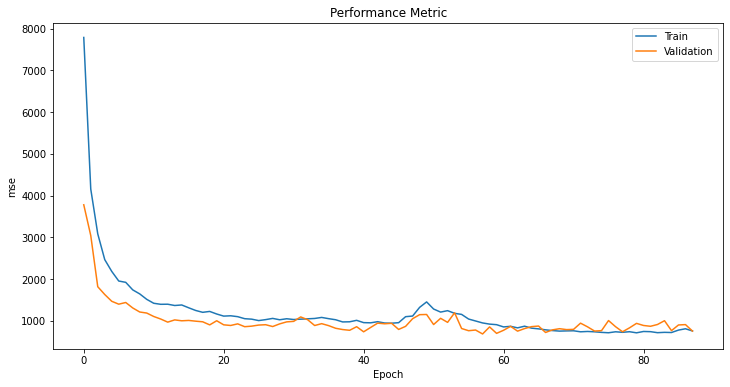

In [28]:
fl = ForecastLSTM()
fl.fit_lstm(
    df=df_train,
    steps=steps,
    single_output=single_output,
    metrics=metrics,
    **lstm_params,
    check_point_path='test'
)

In [29]:
from datetime import datetime, timedelta, date
def add_date(date: str, delta: int, freq: str = "D") -> str:
    """
    date를 기준으로 일, 주, 월 단위로 날짜를 더하여 반환한다.

    Example
    --------
    >>> add_date(date="2022-05-01", delta=3, freq="D")
    '2022-05-04'

    >>> add_date(date="2022-05-01", delta=3, freq="W")
    '2022-05-22'

    >>> add_date(date="2022-05-01", delta=3, freq="M")
    '2022-08-01'
    """
    if isinstance(date, str):
        base_date = datetime.strptime(date, "%Y-%m-%d")
    else:
        try:
            base_date = datetime.strptime(str(date)[:10], "%Y-%m-%d")
        except Exception as err:
            return err

    if freq == "D":
        return (base_date + timedelta(days=delta)).strftime("%Y-%m-%d")
    elif freq == "W":
        return (base_date + timedelta(weeks=delta)).strftime("%Y-%m-%d")
    elif (freq == "M") | (freq == "MS"):
        return (base_date + relativedelta(months=delta)).strftime("%Y-%m-%d")
    elif (freq == "Y") | (freq == "YS"):
        return (base_date + relativedelta(years=delta)).strftime("%Y-%m-%d")
    else:
        raise ValueError("Invalid 'freq'. Use one of 'D', 'W', 'M' and 'Y'")

In [30]:
def generate_test_data(
    self,
    test_df: pd.DataFrame,
    steps: int,
    cutoff: str,
    freq: str,
    seq_len: int,
    single_output: bool = False,
) -> tuple:
    if "average" in test_df.columns:
        test_df = test_df.drop(columns=["average"]).assign(y=test_df["average"])
    else:
        raise KeyError("Not found target column 'average' in dataset.")

    # Features
    X_test = test_df[(test_df.index < cutoff)].iloc[-seq_len:, :-1].sort_index(ascending=True)
    X_test["seq_in"] = cutoff
    # x_data["timestep"] = pd.Series(np.arange(seq_len) + 1, x_data.index)
    X_test["timestep"] = X_test.index
    X_test = X_test.set_index(["seq_in", "timestep"])

    # Target(y)
    step_end = add_date(date=cutoff, delta=steps, freq=freq)
    y_test = test_df[(test_df.index >= cutoff) & (test_df.index < step_end)]["y"]
    if len(y_test) < steps:
        return None, None
    date_idx = pd.date_range(start=cutoff, periods=steps, freq=freq)
    y_test = pd.DataFrame(y_test)
    y_test = y_test.set_index(date_idx)
    if single_output:
        y_test = y_test.tail(1)
    
    return X_test, y_test

ForecastLSTM.generate_test_data = generate_test_data

In [35]:
def eval_test(self,
    test_df: pd.DataFrame,
    steps: int,
    cutoff: str,
    seq_len: int = 16,
    single_output: bool = False,
    metrics: str = "mse",
    check_point_path: str = None,
    verbose: bool = False,
    plot: bool = True,
):

    
    np.random.seed(self.random_seed)
    tf.random.set_seed(self.random_seed)

    # 훈련, 검증 데이터셋 생성
    X =[]
    y = []
    for sample_d in df_test[df_test.index >=cutoff].index[:-steps+1]:
        (
            seq_x,
            seq_y,
        ) = self.generate_test_data(
            test_df = test_df,
            steps=steps,
            seq_len=seq_len,
            freq='D',
            cutoff=sample_d,
            single_output=single_output,
        )
            
        X.append(seq_x.values.tolist())
        y.append(seq_y.values.tolist())
        

    self.X_test = np.array(X)
    self.y_test = np.array(y)

    self.model.load_weights(self.check_point_path )
    
    predict = self.model.predict(self.X_test)
    
    predict = predict[:,0]
    self.y_test = self.y_test[:,0].squeeze()
    
    date = df_test[df_test.index >=cutoff].index[:-steps+1]
    
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(date, predict, marker='o', markersize=0)
    ax.plot(date, self.y_test, marker='o', markersize=0)
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
    dateFmt = mdates.DateFormatter('%Y.%m.%d')
    ax.xaxis.set_major_formatter(dateFmt)
    plt.legend(["predict", "GT"], loc="upper right")
    plt.xticks(rotation=45)
    plt.xlabel("date")
    plt.ylabel("electricity demand")
    plt.show()


ForecastLSTM.eval_test = eval_test

3/3 [==============================] - 0s 3ms/step


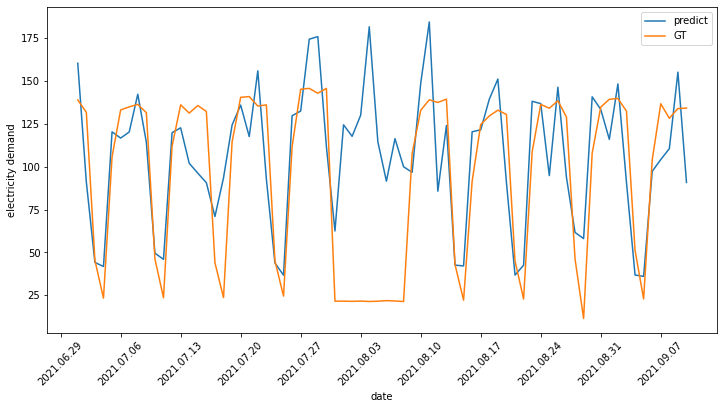

In [36]:
seq_len = 5  # 과거 5주의 데이터를 feature로 사용
steps = 5  # 향후 5주의 y를 예측
single_output = False  # 향후 5주차의 시점만이 아닌, 1~5주 모두 예측
metrics = "mse"  # 모델 성능 지표


predict = fl.eval_test(
    test_df=df_group_day_modeling,
    steps=steps,
    cutoff=cutoff,
    seq_len= seq_len,
    single_output=single_output,
    metrics= metrics,
)

"Overall, the values are similar to the actual measurements, indicating that the prediction model is well-trained. However, there appears to be no electricity demand in early August, which suggests that the factory was shut down during this period.